In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
dataset_dir = "caltech101/"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [3]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [4]:
# Load VGG16 without top layers
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [5]:
for layer in base_model.layers:
   layer.trainable = False

In [6]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 113s 4s/step - loss: 4.0510 - accuracy: 0.1855 - val_loss: 3.5001 - val_accuracy: 0.3035
Epoch 2/10
32/32 [==============================] - 123s 4s/step - loss: 3.0865 - accuracy: 0.3505 - val_loss: 3.0435 - val_accuracy: 0.3570
Epoch 3/10
32/32 [==============================] - 126s 4s/step - loss: 2.5827 - accuracy: 0.4390 - val_loss: 2.6842 - val_accuracy: 0.4175
Epoch 4/10
32/32 [==============================] - 126s 4s/step - loss: 2.1691 - accuracy: 0.5205 - val_loss: 2.4274 - val_accuracy: 0.4615
Epoch 5/10
32/32 [==============================] - 140s 4s/step - loss: 1.8399 - accuracy: 0.5920 - val_loss: 2.2452 - val_accuracy: 0.4925
Epoch 6/10
32/32 [==============================] - 130s 4s/step - loss: 1.5791 - accuracy: 0.6505 - val_loss: 2.1062 - val_accuracy: 0.5320
Epoch 7/10
32/32 [==============================] - 162s 5s/step - loss: 1.3792 - accuracy: 0.7005 - val_loss: 2.0341 - val_accuracy: 0.5355
Epoch 8/10
32

In [8]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 2 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 243s 7s/step - loss: 3.2514 - accuracy: 0.3305 - val_loss: 2.4941 - val_accuracy: 0.4505
Epoch 2/10
32/32 [==============================] - 244s 8s/step - loss: 1.9213 - accuracy: 0.5405 - val_loss: 2.0291 - val_accuracy: 0.5330
Epoch 3/10
32/32 [==============================] - 247s 8s/step - loss: 1.2497 - accuracy: 0.6840 - val_loss: 1.8590 - val_accuracy: 0.5685
Epoch 4/10
32/32 [==============================] - 217s 7s/step - loss: 0.8129 - accuracy: 0.7770 - val_loss: 1.7192 - val_accuracy: 0.5935
Epoch 5/10
32/32 [==============================] - 222s 7s/step - loss: 0.4927 - accuracy: 0.8605 - val_loss: 1.7781 - val_accuracy: 0.6100
Epoch 6/10
32/32 [==============================] - 243s 8s/step - loss: 0.2905 - accuracy: 0.9180 - val_loss: 1.7516 - val_accuracy: 0.6155
Epoch 7/10
32/32 [==============================] - 228s 7s/step - loss: 0.2154 - accuracy: 0.9395 - val_loss: 1.8451 - val_accuracy: 0.5960
Epoch 8/10
32

In [9]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 [==============================] - 101s 2s/step


In [10]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  scissors
Actual:  scissors


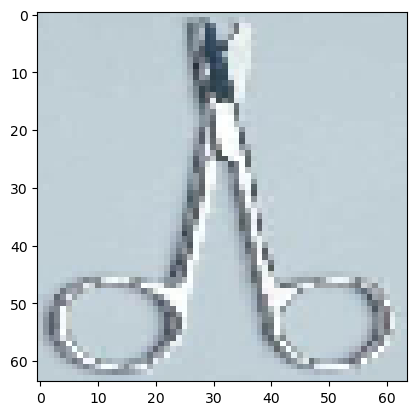

In [11]:
n = 1000
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])